In [1]:
from caik import cai
import skrf as rf
%matplotlib inline
key = cai.CAI(start = True, resolution = 20)
key.esp.current_axis = 2

# ITO Calibration

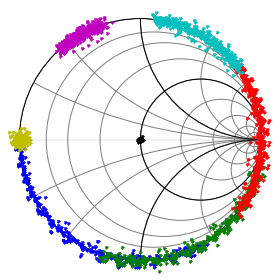

In [4]:
ito_cal = key.take_simple_cal(match = True)


In [11]:
ito_cal.write('ito_cal')

In [297]:
pwd

u'C:\\Users\\Michael\\Documents\\GitHub\\THzCAI\\Research\\Imaging Worksheets\\Silicon Characterization'

time_constant -  turn on and off repeatedly (messed up around 100)

time_temp_constant - isolate thermal transient (noah had canned air turned on once)
time_constant2 - similar to previous
time_constant3 - determine stabilization time of phase (  long running time) 
time_constant4 - isolated projector warm up time (light ocluded by shee, projector left on )
time_constant5 - changed intensity of light with gray background
time_constant6 - no light, hot plate on underneath, heat was increasing with time
time_constant7 - no light no heat, base measurement but probably still cooling

In [313]:
!mkdir time_constant7

In [25]:
rf.stylely()
from pylab import * 

In [314]:
for k in range(500):
    print(k),
    x = key.zva.get_network(name=rf.now_string()+'.s1p')
    x.write_touchstone(dir='time_constant7/')

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

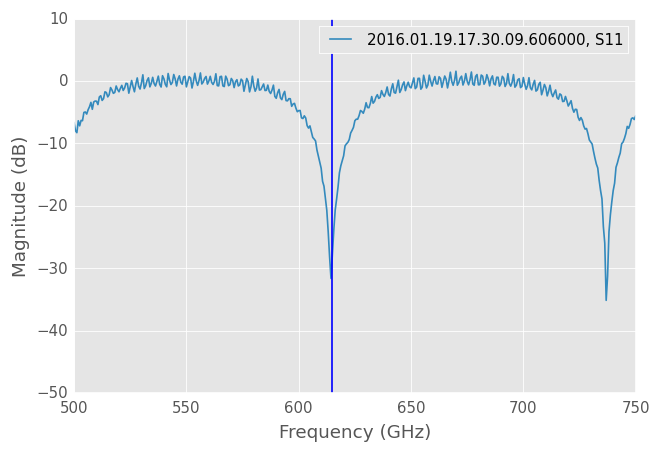

In [265]:
a[1].plot_s_db()
axvline(615)

In [315]:
a=rf.NS.from_dir('time_constant7/')
a.sort()
a=rf.NS(ito_cal.apply_cal_to_list(a))
#plot([k.s_db[0,0,0] for k in a['615ghz']])
#a=a['600-640ghz']
air2=rf.Freespace(frequency=a[0].frequency,z0=50)

In [288]:
a=rf.NS(a[:500])

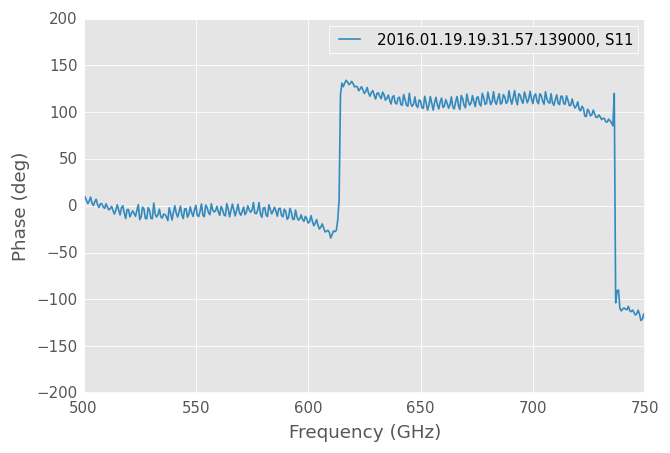

In [316]:
(a[8]/air2.delay_open(3000,'deg')).plot_s_deg()

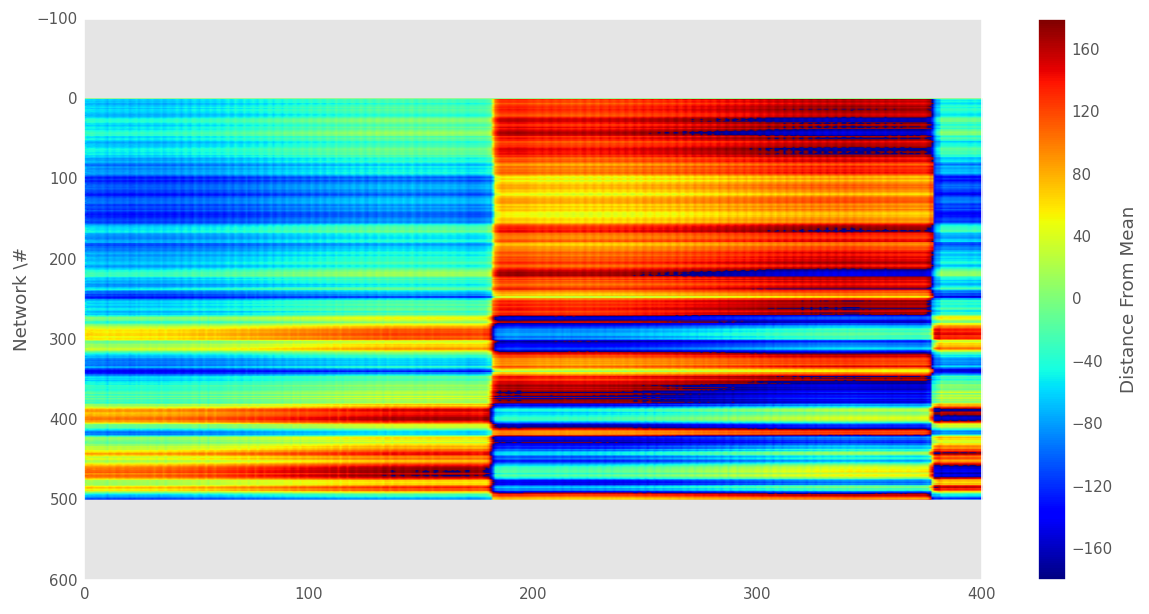

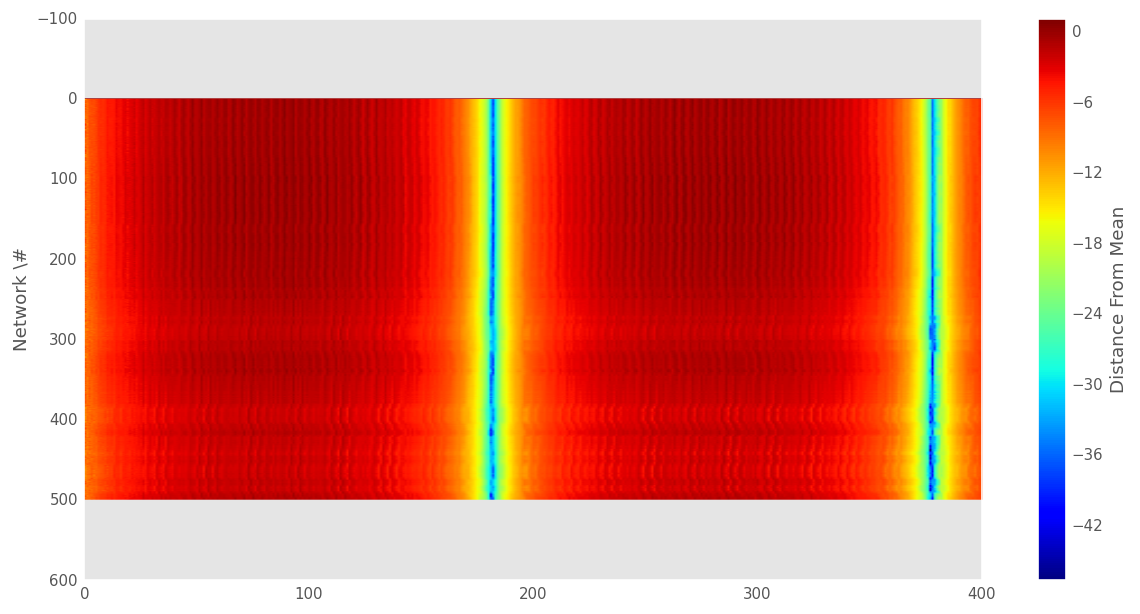

In [311]:
rf.stylely()
a.ntwk_set[0] = air2.delay_open(3100,'deg',name='000')

a.sort()
figure(figsize=(12,6))

a.signature(operation='__div__',component='s_deg')
grid(0)

figure(figsize=(12,6))
a.signature(operation='__div__',component='s_db')
grid(0)

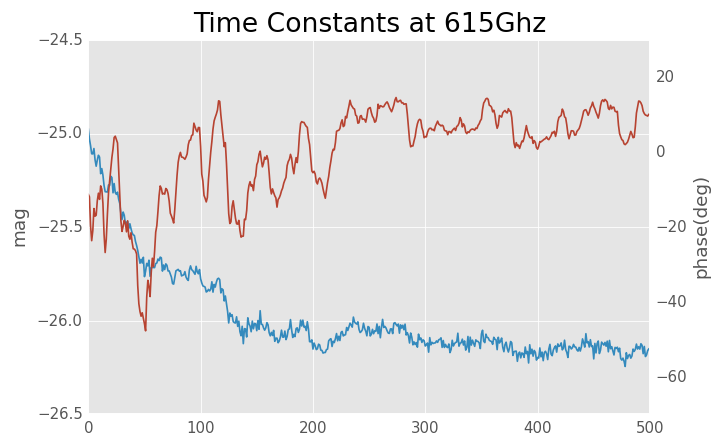

In [317]:
x= [k.s_db[0,0,0] for k in a['615ghz']]
plot(x)
ylabel('mag')
#axhline(array(x[120:]).mean())
twinx()
c = rf.colors()
x= [k.s_deg[0,0,0] for k in a['615ghz']]
plot(x, color=c[1])
ylabel('phase(deg)')
grid(0)
title('Time Constants at 615Ghz')

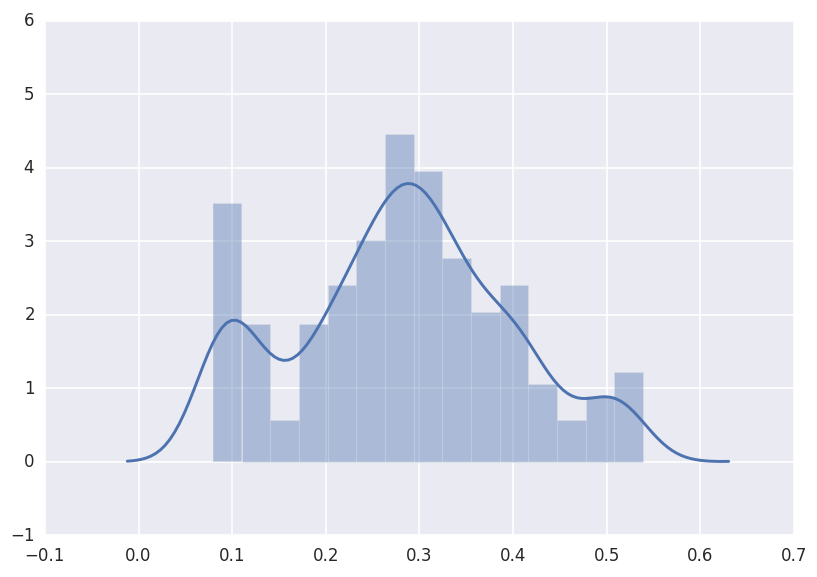

In [244]:
sb.distplot(x[200:])

(-60, 6)

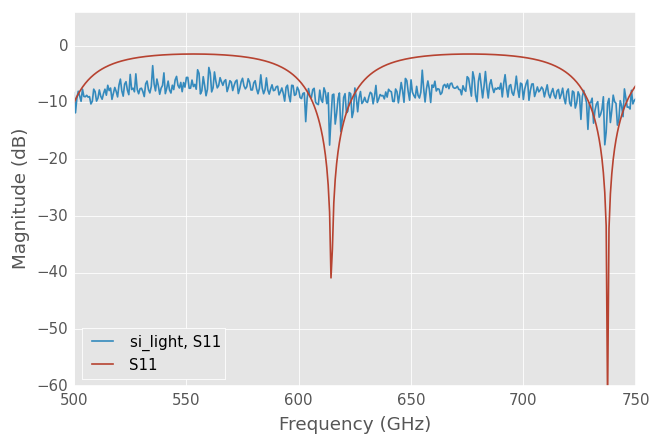

In [57]:
n = 'si_light'

key.zva.write_data(n)

freq = ito_cal.frequency
air=rf.Freespace(freq)
si = rf.Freespace(freq, ep_r=11.8)

m = rf.Network(n+'.s1p')
c= ito_cal.apply_cal(m)
c.plot_s_db()
t = (air.thru()**si.line(355,'um')**air.thru()).s11
t.plot_s_db()
ylim(-60,6)

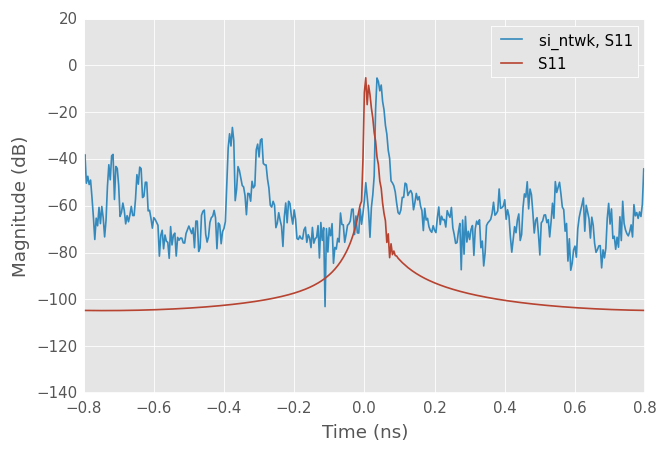

In [33]:
c.plot_s_db_time()
t.plot_s_db_time()
 


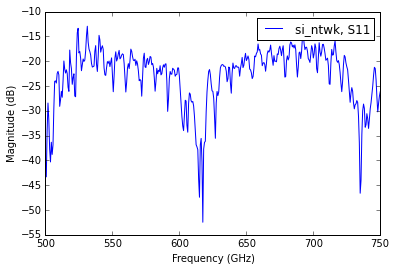

In [16]:
rf.Network('si_ntwk.s1p').plot_s_db()

In [190]:
import os
os.chdir('C:\\Users\\Michael\\Documents\\GitHub\\THzCAI\\Research\\Imaging Worksheets\\Imaging\\Trial 1\\mask25')

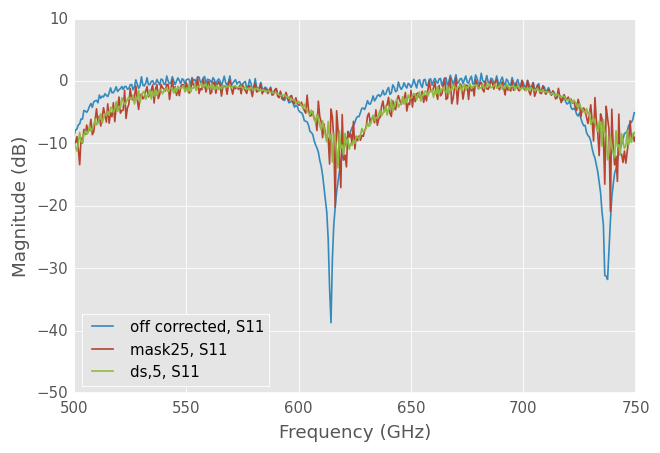

In [203]:
#off_32 = rf.Network('off.s1p')
#off_32_caled = ito_cal.apply_cal(off_32)
#off_32_caled.name = off_32.name + ' corrected'
off_32_caled.plot_s_db()
random_caled = ito_cal.apply_cal(rf.Network('mask25.s1p'))
random_caled.plot_s_db()
cor_25 = ito_cal.apply_cal_to_list( rf.read('mask25_cal.cal').measured)
cor_25_ns = rf.NS(cor_25)
cor_25_ns.mean_s_mag.plot_s_db()

In [7]:
ito = rf.Network('ito_ntwk.s1p')
ito_caled = ito_cal.apply_cal(ito)
ito_caled.name = ito.name + ' corrected'

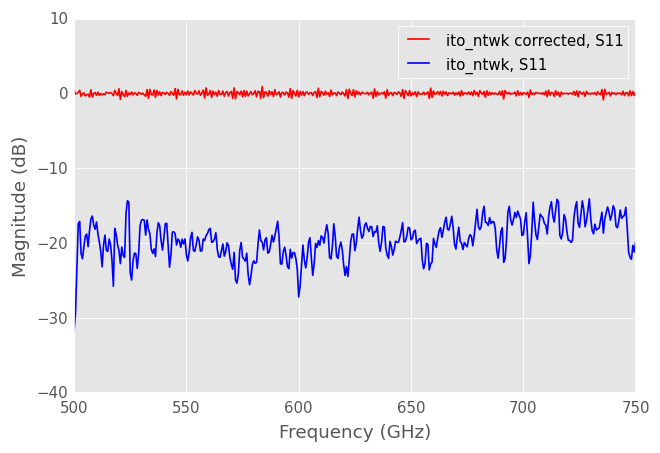

In [11]:
ito_caled.plot_s_db(color = 'r')
ito.plot_s_db(color = 'b')
rf.stylely()

# Introduce Silicon (350 um)
# Calibration with ITO
### First: Projector OFF

In [83]:
key.zva.write_data('off')

In [84]:
off = rf.Network('off.s1p')
off_caled = ito_cal.apply_cal(off)
off_caled.name = off.name + ' corrected'

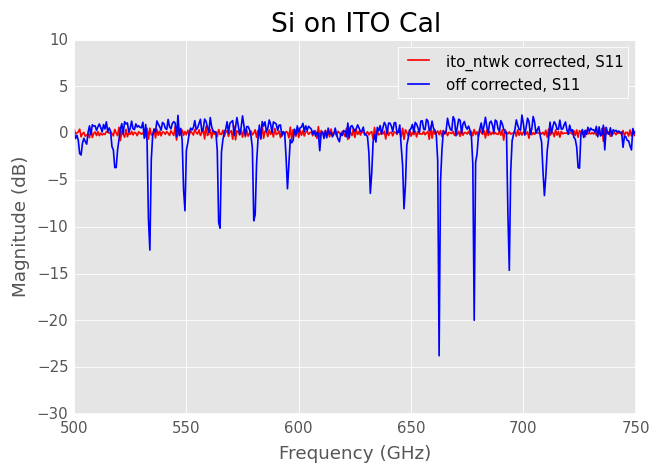

In [85]:
ito_caled.plot_s_db(color = 'r', title = 'Si on ITO Cal')
off_caled.plot_s_db(color = 'b')
rf.stylely()

### Second: Dark and Flood Illumination
#### Projector on but black

In [86]:
key.zva.write_data('dark')

In [87]:
dark = rf.Network('dark.s1p')
dark_caled = ito_cal.apply_cal(dark)
dark_caled.name = dark.name + ' corrected'

#### Projector full on

In [88]:
key.zva.write_data('flood')

In [89]:
flood = rf.Network('flood.s1p')
flood_caled = ito_cal.apply_cal(flood)
flood_caled.name = flood.name + ' corrected'

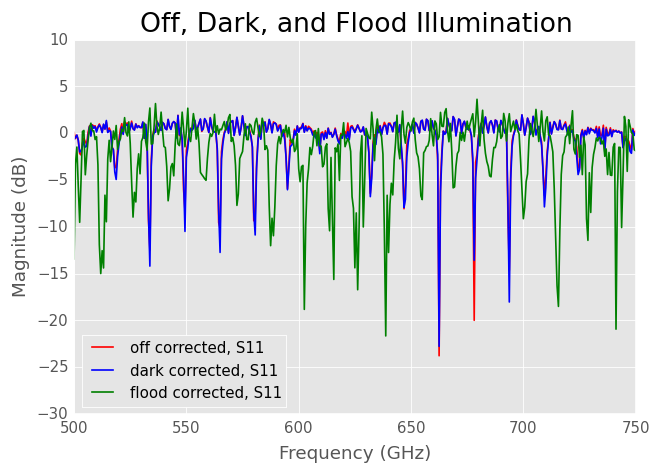

In [90]:
off_caled.plot_s_db(color = 'r', title = 'Off, Dark, and Flood Illumination')
dark_caled.plot_s_db(color = 'b')
flood_caled.plot_s_db(color = 'g')

# Calibration with Si (projector off)

In [93]:
key.zva.write_data('si_off')

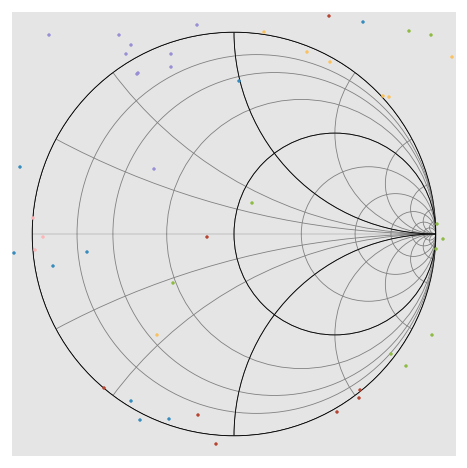

In [41]:
si_cal = key.take_simple_cal()

In [95]:
si_off = rf.Network('si_off.s1p')
si_off_caled = si_cal.apply_cal(si_off)
si_off_caled.name = si_off.name + ' corrected'

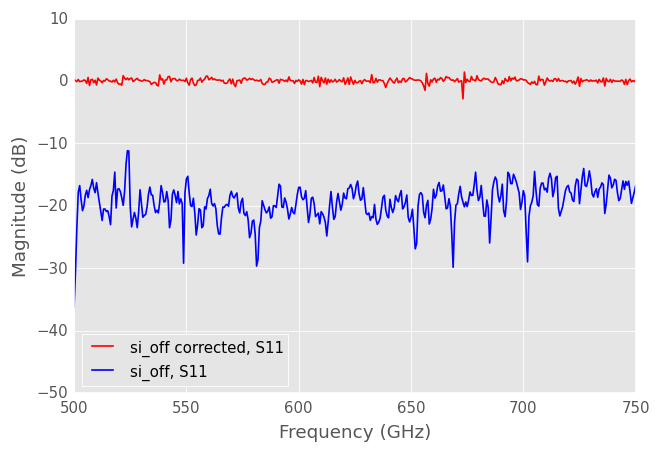

In [96]:
si_off_caled.plot_s_db(color = 'r')
si_off.plot_s_db(color = 'b')

# Zoom in on a smaller band (630 - 670 GHz)

## ITO Calibration

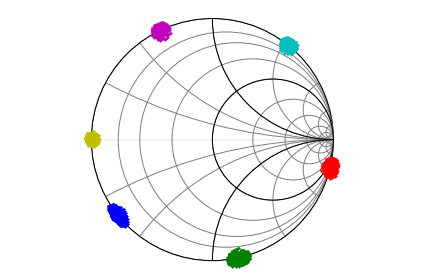

In [3]:
ito_20_cal = key.take_simple_cal()

In [4]:
key.zva.write_data('ito_20_ntwk')

C:\Users\Michael\Anaconda\lib\site-packages\scikit_rf-0.14.1-py2.7.egg\skrf\vi\vna.py:1502: UserWarning: Retriving active trace is not functional. This is a stub.
  warn('Retriving active trace is not functional. This is a stub.')


In [5]:
ito_20 = rf.Network('ito_20_ntwk.s1p')
ito_20_caled = ito_20_cal.apply_cal(ito_20)
ito_20_caled.name = ito_20.name + ' corrected'

In [1]:
ito_20_caled.plot_s_db(color = 'g')
ito_20.plot_s_db(color = 'y')
rf.stylely()

NameError: name 'ito_20_caled' is not defined

# With 350 um High-R Silicon Chip

### Projector OFF

In [28]:
key.zva.write_data('off_20')

In [29]:
off_20 = rf.Network('off_20.s1p')
off_20_caled = ito_20_cal.apply_cal(off_20)
off_20_caled.name = off_20.name + ' corrected'

### Projector Dark

In [30]:
key.zva.write_data('dark_20')

In [31]:
dark_20 = rf.Network('dark_20.s1p')
dark_20_caled = ito_20_cal.apply_cal(dark_20)
dark_20_caled.name = dark_20.name + ' corrected'

### Projector ON (Full Illumination)

In [32]:
key.zva.write_data('flood_20')

In [33]:
flood_20 = rf.Network('flood_20.s1p')
flood_20_caled = ito_20_cal.apply_cal(flood_20)
flood_20_caled.name = flood_20.name + ' corrected'

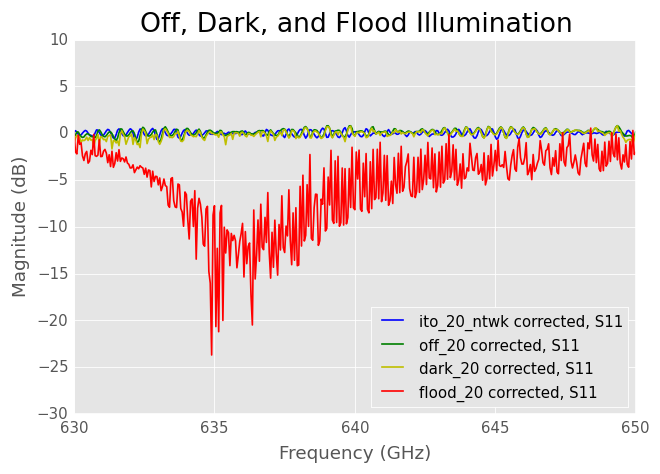

In [34]:
ito_20_caled.plot_s_db(color = 'b', title = 'Off, Dark, and Flood Illumination')
off_20_caled.plot_s_db(color = 'g')
dark_20_caled.plot_s_db(color = 'y')
flood_20_caled.plot_s_db(color = 'r')

# Test Calibration with Si

OnePort Calibration: '', 500-750 GHz, 401 pts, 6-standards

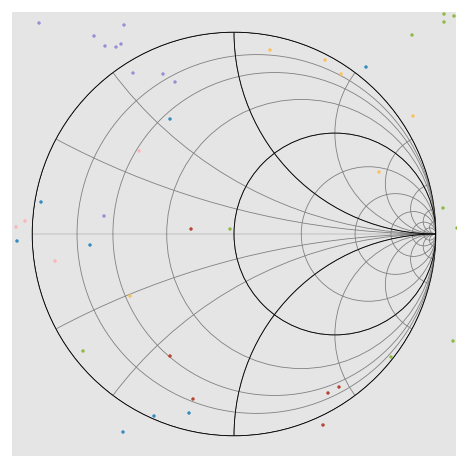

In [40]:
key.take_simple_cal()

# Summary
It is possible to get about 15-20 dB difference in reflection magnitude on certain frequencies by exciting carriers on the surface of a high resistivity 350 um thick Si chip.